# Assignment 6

### This Assignment is due by 11:59 pm EDT March 31. Type your solution in the cells following '# your code is here'. Please, upload your solution to a corresponding Dropbox on LEARN.

## Problem 1: Quantum Oscillators (4 points)

Consider the one-dimensional, time-independent Schrödinger equation in a harmonic (i.e. quadratic) potential $V(x)=V_0 x^2/a_0^2$, where $V_0$ is a constant and $a_0$ is the Bohr radius. Let's assume that we already work in atomic units so that the equation has the form:

$$
\psi''(x) + k^2(x) \psi(x) = 0, \qquad k^2(x) = E -V(a_0x).
$$

a) Find the energies of the ground state and the first two excited states assuming $V_0 = 4$. Note that in theory the wavefunction goes all the way out to $x=\pm\infty$, but you can get good answers by using a finite symmetric  interval.  In this part of the problem use the interval from $-3$ to $+3$, with the wavefunction $\psi=0$ at both boundaries. Plot the normalized wavefunctions as functions of $x$ on one plot for $-3<x<3$.

b) Repeat part a) for the anharmonic oscillator with $V(x) = V_0 x^4/a_0^4$, where $V_0 = 4$.
However, in this part use the interval from $-2$ to $+2$ because larger intervals may cause problems with convergence.

Part a): Harmonic potential

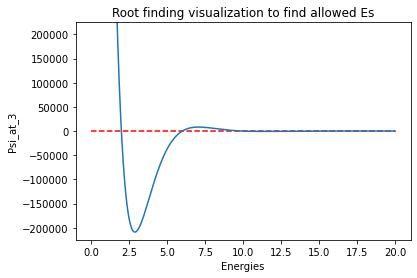

The ground state energy is E0 =  2.000000267529181
The first excited state energy is E1 =  6.000009566555775
The second excited state energy is E2 =  10.000151245376856


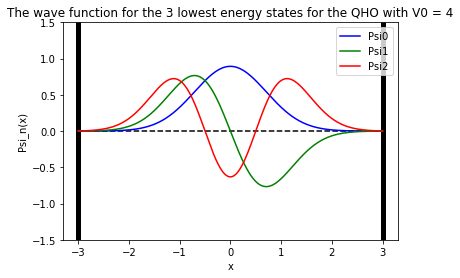

In [25]:
from scipy.integrate import odeint
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt 
import math

a0 = 4*math.pi*scipy.constants.epsilon_0*scipy.constants.hbar**2/(scipy.constants.electron_mass*scipy.constants.elementary_charge**2)

#Shoot method for eigenvalue problems from lectures
def Shoot_Schrodinger(F, a, b, E1, E2, kmax=200, eps=1.e-6):
    """ The program combines the 'odeint' solver with the binary search to find the 
  eigenenergies of the Schrodinger equation in atomic units. a and b are the initial and 
  final points of interval. E1 and E2 are the bracketing values for energy. F is the name
  of the class corresponding to the given potential (with energy $E$ being the attribute)
  containing method f representing the righthand side of the ODE standard form."""

    E = None
    f1 = odeint(F(E1).f, [0.0, 1.0], [a, b], tfirst=True)[-1, 0] #assumed derivative 1.0
    f2 = odeint(F(E2).f, [0.0, 1.0], [a, b], tfirst=True)[-1, 0]    
    if f1*f2 > 0: return None
    
    for k in range(kmax):
        Emid = (E1 + E2)/2
        fmid = odeint(F(Emid).f, [0.0, 1.0], [a, b], tfirst=True)[-1, 0]       
        if f1*fmid > 0: f1, E1 = fmid, Emid 
        else: f2, E2 = fmid, Emid
            
        if abs(f2-f1) < eps:
            E = 0.5*(E2+E1)
            break   
    return E

#Class quantum harmonic oscillator to be used and passed to Shoot_Schrodinger
class QHO1D_V():
    def __init__(self,E,V0=4.0):
        self.E = E
        self.V0 = V0

    def f(self, t, y):
        return np.array([y[1], -(self.E-self.V0*t**2)*y[0]])

    
#Creating values to plot Psi_at_3 as a function of E
Es = np.linspace(0.0, 20, 1000)
Psi_at_3 = np.array([odeint(QHO1D_V(E).f, [0.0, 1.0], [-3.0, 3.0], tfirst=True)[-1, 0] for E in Es]) 

#Plotting for the boundary value Psi_at_3
plt.plot(Es, Psi_at_3)
plt.ylim(-225000,225000)
plt.hlines([0], Es[0], Es[-1], colors="red", linestyles="--")
plt.xlabel('Energies'); plt.ylabel('Psi_at_3')
plt.title("Root finding visualization to find allowed Es")
plt.show()

E0 = Shoot_Schrodinger(QHO1D_V, -3.0, 3.0, 1.0, 3.0, kmax = 200, eps = 1.e-8)
print("The ground state energy is E0 = ", E0)
E1 = Shoot_Schrodinger(QHO1D_V, -3.0, 3.0, 5.0, 7.5, kmax = 200, eps = 1.e-8)
print("The first excited state energy is E1 = ", E1)
E2 = Shoot_Schrodinger(QHO1D_V, -3.0, 3.0, 8.0, 11.0, kmax = 200, eps = 1.e-8)
print("The second excited state energy is E2 = ", E2)

#Plotting for the different Psi
x = np.linspace(-3.0,3.0,1001)

#Psi0
psi0 = odeint(QHO1D_V(E0).f, [0.0, 1.0], x, tfirst=True)[:,0]
A0 = np.trapz(psi0**2,x)
psi0 = psi0/math.sqrt(A0)

#Psi1
psi1 = odeint(QHO1D_V(E1).f, [0.0, 1.0], x, tfirst=True)[:,0]
A1 = np.trapz(psi1**2,x)
psi1 = psi1/math.sqrt(A1)

#Psi2
psi2 = odeint(QHO1D_V(E2).f, [0.0, 1.0], x, tfirst=True)[:,0]
A2 = np.trapz(psi2**2,x)
psi2 = psi2/math.sqrt(A2)

plt.plot(x,psi0, 'b-', label = "Psi0" )
plt.plot(x,psi1, 'g-', label = "Psi1" )
plt.plot(x,psi2, 'r-', label = "Psi2" )
plt.vlines([-3,3], -1.5, 1.5, lw = 5, color = "black")
plt.hlines([0], -3, 3, color = "black", linestyles = "--")
plt.ylim(-1.5,1.5)
plt.xlabel("x")
plt.ylabel("Psi_n(x)")
plt.title("The wave function for the 3 lowest energy states for the QHO with V0 = 4")
plt.legend(loc = "best")
plt.show()




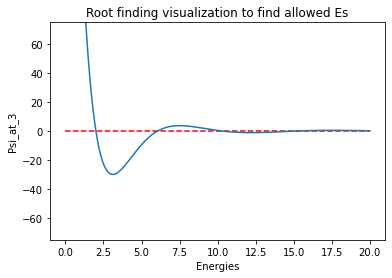

The ground state energy is E0 =  2.0039723305380903
The first excited state energy is E1 =  6.053962992154993
The second excited state energy is E2 =  10.3182482579723


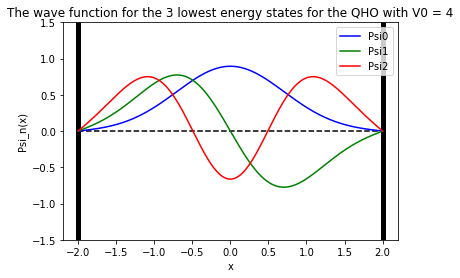

In [26]:
class QAO1D_V:

    def __init__(self, E, V0 = 4):
        self.E = E
        self.V0 = V0

    def f(self, t, y):
        return np.array([y[1], -(self.E-self.V0*t**4)*y[0]])

Es = np.linspace(0.0, 20, 1000)
Psi_at_2 = np.array([odeint(QHO1D_V(E).f, [0.0, 1.0], [-2.0, 2.0], tfirst=True)[-1, 0] for E in Es]) 

plt.plot(Es,Psi_at_2)
plt.ylim(-75,75)
plt.hlines([0], Es[0], Es[-1], colors="red", linestyles="--")
plt.xlabel('Energies'); plt.ylabel('Psi_at_3')
plt.title("Root finding visualization to find allowed Es")
plt.show()


E0 = Shoot_Schrodinger(QHO1D_V, -2.0, 2.0, 1.0, 3.0, kmax = 200, eps = 1.e-8)
print("The ground state energy is E0 = ", E0)
E1 = Shoot_Schrodinger(QHO1D_V, -2.0, 2.0, 5.0, 7.5, kmax = 200, eps = 1.e-8)
print("The first excited state energy is E1 = ", E1)
E2 = Shoot_Schrodinger(QHO1D_V, -2.0, 2.0, 8.0, 11.0, kmax = 200, eps = 1.e-8)
print("The second excited state energy is E2 = ", E2)

#Plotting for the different Psi
x = np.linspace(-2.0,2.0,1001)

#Psi0
psi0 = odeint(QHO1D_V(E0).f, [0.0, 1.0], x, tfirst=True)[:,0]
A0 = np.trapz(psi0**2,x)
psi0 = psi0/math.sqrt(A0)

#Psi1
psi1 = odeint(QHO1D_V(E1).f, [0.0, 1.0], x, tfirst=True)[:,0]
A1 = np.trapz(psi1**2,x)
psi1 = psi1/math.sqrt(A1)

#Psi2
psi2 = odeint(QHO1D_V(E2).f, [0.0, 1.0], x, tfirst=True)[:,0]
A2 = np.trapz(psi2**2,x)
psi2 = psi2/math.sqrt(A2)

plt.plot(x,psi0, 'b-', label = "Psi0" )
plt.plot(x,psi1, 'g-', label = "Psi1" )
plt.plot(x,psi2, 'r-', label = "Psi2" )
plt.vlines([-2,2], -1.5, 1.5, lw = 5, color = "black")
plt.hlines([0], -2, 2, color = "black", linestyles = "--")
plt.ylim(-1.5,1.5)
plt.xlabel("x")
plt.ylabel("Psi_n(x)")
plt.title("The wave function for the 3 lowest energy states for the QHO with V0 = 4")
plt.legend(loc = "best")
plt.show()







## Problem 2: A skydiver (5 points)

A skydiver exits a non-moving helicopter at the height of $1000$ meters without any initial velocity at $t_i = 0$. At which height $y_s$ should he open his parachute if he wants to touch down at $t_f = 60$ seconds on the ground $y = 0$? Assume that the flight takes place without friction if the parachute is closed (which is an approximation of course). For the open parachute, let's assume that the friction is proportional to the square of the speed. The differential equation describing the motion is ($g = 9.81 m/s^2$):

$$
\frac{d^2 y}{dt^2} = -g + f\left( y,\frac{d y}{dt} \right),
$$

where

$$
f\left( y,\frac{d y}{dt} \right) = \begin{cases} 
0, \quad y\ge y_s, \\
\alpha \left(\displaystyle\frac{d y}{dt} \right)^2, \quad y < y_s
\end{cases} 
$$

with $\alpha = 0.1 m^{-1}$.

After finding the correct value of $y_s$, plot height $y$ as a function of time.

Hint: Use the shooting method (combining 'odeint' with bisection) to determine parameter $y_s$.

In [27]:
# your code is here

def Shoot_Bisec_Modified(F, t0 = 0.0, T = 60.0, y0 = 1000.0, yT = 0.0, y1 = 500.0, y2 =550.0 , kmax=500, eps=1.e-6):
    """ The program combines the 'odeint' solver with the binary search to solve
    the Dirichlet problem for a 2nd order ODE. v1 and v2 are the initial trial values 
    for the first derivatives. t0 and T are the initial and final points and
    y0 and yT are the values of function f at these boundary points."""

    yshute = None
    f1 = odeint(F(y1).f, [1000.0,0.0], [0.0, 60.0], tfirst=True)[-1, 0]
    f2 = odeint(F(y2).f, [1000.0,0.0], [0.0, 60.0], tfirst=True)[-1, 0] 
    print(f1)
    print(f2) 
    if (f1-yT)*(f2-yT) > 0: return None
    
    for k in range(kmax):
        ymid = (y1 + y2)/2
        fmid = odeint(F(ymid).f, [y0, 0.0], [t0, T], tfirst=True)[-1, 0]
        
        if (f1-yT)*(fmid-yT) > 0: f1, y1 = fmid, ymid 
        else: f2, y2 = fmid, ymid
            
        if abs(f2-f1) < eps:
            yshute = 0.5*(y2+y1)
            break   
    return yshute

class SkyDive():
    def __init__(self, yshute):
        self.yshute = yshute

    def f(self, t, y):
        if y[0] >= self.yshute:
            fv = -scipy.constants.g
        elif y[0] < self.yshute:
            fv = -scipy.constants.g + 0.1*y[1]**2
        return np.array([y[1],fv], float)
            
yshutes = np.linspace(400,600,1000)

y_at_60 = np.array([odeint(SkyDive(y).f, [1000.0,0.0], [0.0, 60.0], tfirst=True)[-1, 0] for y in yshutes]) 

plt.plot(yshutes, y_at_60)
plt.hlines([0], Ys[0], Ys[-1], colors="red", linestyles="--")
plt.xlabel('Values of ys'); plt.ylabel('y at t = 60')
plt.title("Root finding visualization to find allowed ys")
plt.show()

yshute = Shoot_Bisec_Modified(SkyDive)
ts = np.linspace(0.0, 60.0, 10001)
ys = odeint(SkyDive(yshute).f, [1000.0,0.0], ts, tfirst = True)
plt.plot(ts,ys[:,0])


NameError: name 'Ys' is not defined

## Problem 3: Laplace equation with mixed boundary conditions (6 poins)

Apply the Successive overrelaxation method (SOR) described on the lecture to solve Laplace equation for the potential $\Phi (x,y)$ in a $1$m by $1$m square, subject to the following mixed BC ($x$ and $y$ are in meters):

$$
\Phi (0, y) = 1, \qquad \displaystyle\frac{\partial\Phi(1,y)}{\partial y} = 2, \qquad
\displaystyle\frac{\partial\Phi(x,0)}{\partial x} = 0, \qquad
\displaystyle\frac{\partial\Phi(x,1)}{\partial x} = 0.
$$

Use the number of grid points in each direction equal to $N_{max} = 100$. Make both the 3D surface and contour plots for your solution.

Hint: Think how to modify 'SOR_Poisson' function from a lecture to solve the task for the above-written boundary conditions. 

The error 9.994832318442977e-06 after 4993 iterations


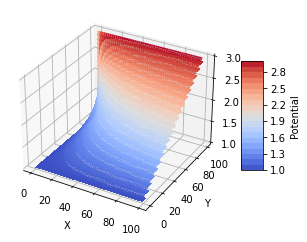

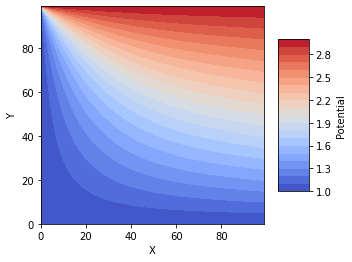

In [29]:
# your code is here

def GS_odd_even(Phi, rho, a):
    
    """This function uses the Gauss-Seidel method to obtain the values of NumPy array 
    Phi for all points except those at the boundaries.
    Initial array Phi and a 2D Numpy array rho are given. a is the lattice constant """
    
    # even update (uses old odd)
    Phi[1:-2:2, 1:-2:2] = 0.25*(Phi[2::2, 1:-2:2] + Phi[0:-2:2, 1:-2:2]\
                + Phi[1:-2:2, 2::2] + Phi[1:-2:2, 0:-2:2] + rho[1:-2:2, 1:-2:2]*a**2) 
    Phi[2:-1:2, 2:-1:2] = 0.25*(Phi[3::2, 2:-1:2] + Phi[1:-2:2, 2:-1:2]\
                + Phi[2:-1:2, 3::2] + Phi[2:-1:2, 1:-2:2] + rho[2:-1:2, 2:-1:2]*a**2)
    
    
    # odd update (uses new even)
    Phi[1:-2:2, 2:-1:2] = 0.25*(Phi[2::2, 2:-1:2] + Phi[0:-2:2, 2:-1:2]\
                + Phi[1:-2:2, 3::2] + Phi[1:-2:2, 1:-1:2] + rho[1:-2:2, 2:-1:2]*a**2)
    Phi[2:-1:2, 1:-2:2] = 0.25*(Phi[3::2, 1:-2:2] + Phi[1:-2:2, 1:-2:2]\
                + Phi[2:-1:2, 2::2] + Phi[2:-1:2, 0:-2:2] + rho[2:-1:2, 1:-2:2]*a**2)
    
    return Phi
    

Nmax = 100 # number of points in each direction 
a = 1.0/(Nmax-1)   #lattice constant
# create initial array
Phi0  = np.zeros((Nmax, Nmax))  # note that there are Nmax points in each direction
                                # the left(lower)-most points are indexed with zero
                                   # the right(upper)-most points are indexed with Nmax-1

#We find boundary using the fact that Phi(0,y)=1 thus Phi(0,0) and Phi(0,1) = 1. Solving the first DE we get Phi(1,y) 2*y+h(x) thus Phi(1,0) = f(x) Phi(1,1) = 2+f(x). Solving the last 2 DE gives us Phi(x,0) = C +f(0) Phi(x,1) = C +f(y). We see that f(y) must then be 2*y and h(x) = C. We then solve for C amnd get C = 1
Phi0[0, :] = 1.0         
Phi0[:, 0] = 1.0
Phi0[:, Nmax-1] = 3.0
for i in range(0,Nmax):
    Phi0[Nmax-1,i] = 2*a*i+1

rho  = np.zeros((Nmax, Nmax)) # charge density is zero



def SOR_Poisson(Phi0, rho, a, om = 0.9, kmax = 100000, eps = 1.e-5):    
    """ The program uses the successive overrelaxation method to solve the Dirichlet 
    problem for a Poisson equation. om is the overrelaxation parameter."""
     
    for k in range(kmax):
        Phi  = np.copy(Phi0)
        Phi = GS_odd_even(Phi, rho, a) #update inplace Phi except the boundary points
        res = Phi[:,:]- Phi0[:,:] # the residuals
        
        if np.linalg.norm(res) < eps:  # we will use the Frobenius norm
            print('The error {} after {} iterations'.format(np.linalg.norm(res), k+1))
            break 
        Phi0[:,:] = Phi[:,:] + om*res[:,:]
        
    else: Phi = None # if the accuracy is not achieved after kmax iterations    
    
    return Phi

PhiRes = SOR_Poisson(Phi0, rho, a, om = 0.9, kmax = 100000, eps = 1.e-5)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
x = np.arange(PhiRes.shape[0])
y = np.arange(PhiRes.shape[1])
X, Y = np.meshgrid(x, y)
Z = PhiRes[X, Y]  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap = plt.cm.coolwarm)
ax.set_xlabel('X'); ax.set_ylabel('Y')

#plot the colorbar
cset = ax.contourf(X, Y, Z, 20, cmap = plt.cm.coolwarm)
cb = fig.colorbar(cset, shrink=0.5, aspect=5); cb.set_label('Potential')
plt.show()

fig = plt.figure(figsize=(5,4)); ax = fig.add_subplot(111)

cset = ax.contourf(X, Y, Z, 20, cmap = plt.cm.coolwarm)
ax.set_xlabel('X');  ax.set_ylabel('Y')
cb = fig.colorbar(cset, shrink = 0.7, aspect = 5)
cb.set_label('Potential'); plt.show()